In [4]:
import ambulance_game as abg
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci


# Visualising the model


In [5]:
lambda_2 = 0.4
lambda_1 = 0.3
mu = 0.4

num_of_servers = 3
threshold = 2
system_capacity = 4
buffer_capacity = 2


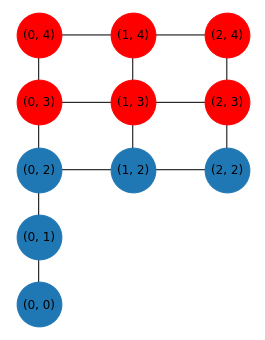

In [6]:
abg.markov.visualise_ambulance_markov_chain(
    num_of_servers, threshold, system_capacity, buffer_capacity
)
plt.show()


# Viewing the symbolic transition matrix


In [7]:
Q_sym = abg.markov.get_symbolic_transition_matrix(
    num_of_servers, threshold, system_capacity, buffer_capacity
)
all_states = abg.markov.build_states(threshold, system_capacity, buffer_capacity)


In [8]:
Q_sym


Matrix([
[-Lambda,       Lambda,                             0,                             0,                 0,                             0,                             0,                 0,                 0,                 0,         0],
[     mu, -Lambda - mu,                        Lambda,                             0,                 0,                             0,                             0,                 0,                 0,                 0,         0],
[      0,         2*mu, -lambda**A - lambda**o - 2*mu,                     lambda**A,                 0,                     lambda**o,                             0,                 0,                 0,                 0,         0],
[      0,            0,                          2*mu, -lambda**A - lambda**o - 2*mu,         lambda**A,                             0,                     lambda**o,                 0,                 0,                 0,         0],
[      0,            0,                        

# Building the transition matrix


In [9]:
lambda_2 = 0.4
lambda_1 = 0.3
mu = 0.4

num_of_servers = 3
threshold = 2
system_capacity = 4
buffer_capacity = 2


In [10]:
Q = abg.markov.get_transition_matrix(
    lambda_2, lambda_1, mu, num_of_servers, threshold, system_capacity, buffer_capacity
)


In [11]:
# np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=0)
Q


array([[-0.7,  0.7,  0. , ...,  0. ,  0. ,  0. ],
       [ 0.4, -1.1,  0.7, ...,  0. ,  0. ,  0. ],
       [ 0. ,  0.8, -1.5, ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ..., -1.6,  0.4,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. , -1.6,  0.4],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. , -1.2]])

# Get numeric transition matrix from symbolic


In [12]:
Q_converted = abg.markov.convert_symbolic_transition_matrix(
    Q_sym=Q_sym, lambda_2=0.4, lambda_1=0.3, mu=0.4
)


In [13]:
np.allclose(Q, Q_converted)


True

# Obtain steady state numerically (Using odeint/solve_ivp)


###### By integration of ODEs using odeint()


In [14]:
sol1 = abg.markov.get_steady_state_numerically(
    Q, integration_function=sci.integrate.odeint
)
print(abg.markov.is_steady_state(sol1, Q))
print(np.sum(sol1))


True
0.9999999999999938


###### By ODEs integration using solve_ivp()


In [15]:
sol2 = abg.markov.get_steady_state_numerically(
    Q, integration_function=sci.integrate.solve_ivp
)
print(abg.markov.is_steady_state(sol2, Q))
print(np.sum(sol2))


True
0.9999999999999969


# Obtain steady state algebraically


###### Using a linear algebraic approach


In [16]:
sol3 = abg.markov.get_steady_state_algebraically(Q, algebraic_function=np.linalg.solve)
print(abg.markov.is_steady_state(sol3, Q))
print(np.sum(sol3))


True
1.0


###### Using a least squares approach


In [17]:
sol4 = abg.markov.get_steady_state_algebraically(Q, algebraic_function=np.linalg.lstsq)
print(abg.markov.is_steady_state(sol4, Q))
print(np.sum(sol4))


True
0.9999999999999999


# Performance measures


###### Average people in the whole system


In [18]:
abg.markov.get_mean_number_of_patients_in_system(sol4, all_states)


2.077983992194915

###### Average people in the hospital


In [19]:
abg.markov.get_mean_number_of_patients_in_hospital(sol4, all_states)


1.6171165300960482

###### Average number of ambulances being blocked


In [20]:
abg.markov.get_mean_ambulances_blocked(sol4, all_states)


0.46086746209886714

###### Mean time in the system


In [21]:
def get_mean_time_in_system(pi, states, lambda_2, lambda_1, mu=None):
    mean_patients = abg.markov.get_mean_number_of_patients_in_system(pi, states)
    mean_time = mean_patients / (lambda_2 + lambda_1)
    return mean_time


In [23]:
get_mean_time_in_system(sol4, all_states, lambda_2, lambda_1, mu)


2.96854856027845

###### Mean time in the Hospital


In [26]:
def get_mean_time_in_hospital(pi, states, lambda_2, lambda_1, mu=None):
    mean_patients = abg.markov.get_mean_number_of_patients_in_hospital(pi, states)
    mean_time = mean_patients / (lambda_2 + lambda_1)
    return mean_time


In [27]:
get_mean_time_in_hospital(sol4, all_states, lambda_2, lambda_1, mu)


2.310166471565783

###### Mean Waiting time in the hospital


In [33]:
def get_mean_waiting_time_1(pi, states, lambda_2, lambda_1, mu):
    mean_patients = abg.markov.get_mean_number_of_patients_in_hospital(pi, states)
    mean_waiting_time = (mean_patients / (lambda_2 + lambda_1)) - (1 / mu)
    return mean_waiting_time


def get_mean_waiting_time_2(pi, states, lambda_2, lambda_1, mu):
    mean_patients = abg.markov.get_mean_number_of_patients_in_hospital(pi, states)
    mean_waiting_time = (mean_patients / (lambda_1)) - (1 / mu)
    return mean_waiting_time


In [34]:
get_mean_waiting_time_1(sol4, all_states, lambda_2, lambda_1, mu)


-0.18983352843421697

In [35]:
get_mean_waiting_time_2(sol4, all_states, lambda_2, lambda_1, mu)


2.890388433653494

###### Mean blocking time


In [36]:
def get_mean_blocking_time(pi, states, lambda_2, lambda_1=None, mu=None):
    mean_ambulances = abg.markov.get_mean_ambulances_blocked(pi, states)
    mean_blocking_time = mean_ambulances / lambda_2
    return mean_blocking_time


In [37]:
get_mean_blocking_time(sol4, all_states, lambda_2, lambda_1, mu)


1.1521686552471677

# Dummy Cells
